<a href="https://colab.research.google.com/github/Roshan4113/Web-Scrapping/blob/main/Fraud_Detection_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Data Retrievel

In [ ]:
df = pd.read_csv('Fraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


  ## 2.a Exploratory Data Analysis

### 1.Analyze the Distribution of isFraud and isFlaggedFraud

In [ ]:
fraud_counts = df['isFraud'].value_counts(normalize=True) * 100
flagged_counts = df['isFlaggedFraud'].value_counts(normalize=True) * 100
print("isFraud Distribution:\n", fraud_counts)
print("isFlaggedFraud Distribution:\n", flagged_counts)

isFraud Distribution:
 isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64
isFlaggedFraud Distribution:
 isFlaggedFraud
0    99.999749
1     0.000251
Name: proportion, dtype: float64


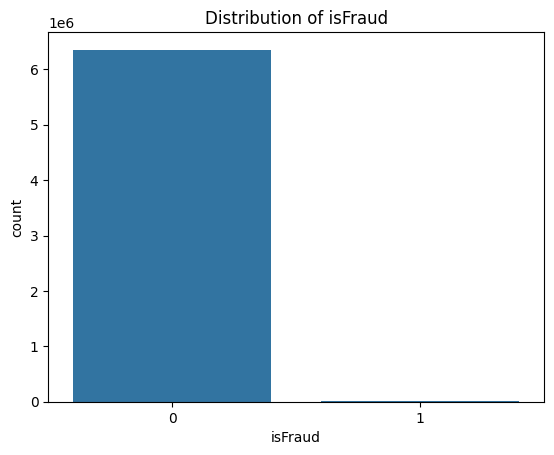

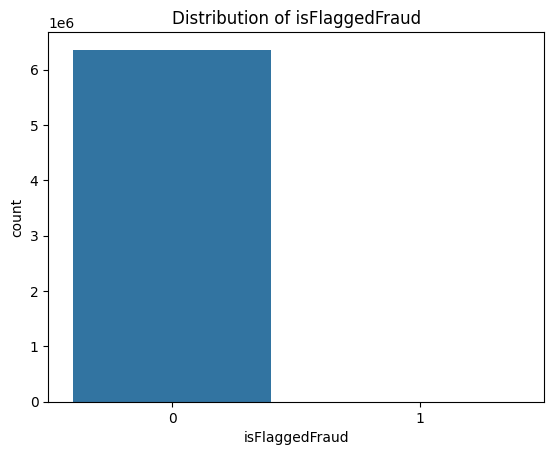

In [ ]:
import seaborn as sns
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of isFraud')
plt.show()

sns.countplot(x='isFlaggedFraud', data=df)
plt.title('Distribution of isFlaggedFraud')
plt.show()


### Inferences: Here we can see that the Fraud distribution is nearly : 0.12 %


### 2. Pivot Table Anaylsis

In [ ]:
import numpy as np
pd.pivot_table(df,index=['type'],values=['amount','isFraud','isFlaggedFraud'],aggfunc = np.sum)

C:\Users\ROSHAN\AppData\Local\Temp\ipykernel_15168\542720692.py:2: FutureWarning: The provided callable <function sum at 0x000001E38E838FE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=['type'],values=['amount','isFraud','isFlaggedFraud'],aggfunc = np.sum)


,amount,isFlaggedFraud,isFraud
type,,,
CASH_IN,2.363674e+11,0,0
CASH_OUT,3.944130e+11,0,4116
DEBIT,2.271992e+08,0,0
PAYMENT,2.809337e+10,0,0
TRANSFER,4.852920e+11,16,4097


### Inferences: The Pivot table shown that Fraud Transaction is occur while Cash Out Process


### 3.Correlation between numrical columns

In [ ]:
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()
print(correlation_matrix)


                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   

                newbalanceDest  
amount                0.459304  
oldbalanceOrg         0.042029  
newbalanceOrig        0.041837  
oldbalanceDest        0.976569  
newbalanceDest        1.000000  


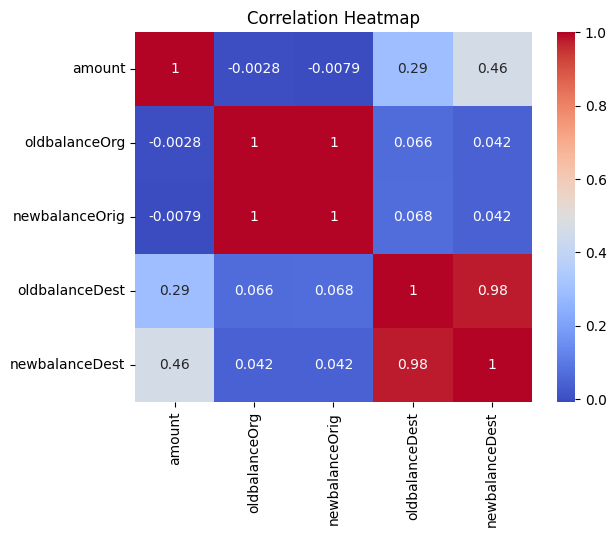

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df[['amount','oldbalanceOrg','newbalanceOrig']].corr()

,amount,oldbalanceOrg,newbalanceOrig
amount,1.000000,-0.002762,-0.007861
oldbalanceOrg,-0.002762,1.000000,0.998803
newbalanceOrig,-0.007861,0.998803,1.000000


### 4.Check for Class Imbalance in isFraud

In [ ]:
fraud_ratio = df['isFraud'].value_counts(normalize=True)
print("Fraud Class Distribution:\n", fraud_ratio)


Fraud Class Distribution:
 isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


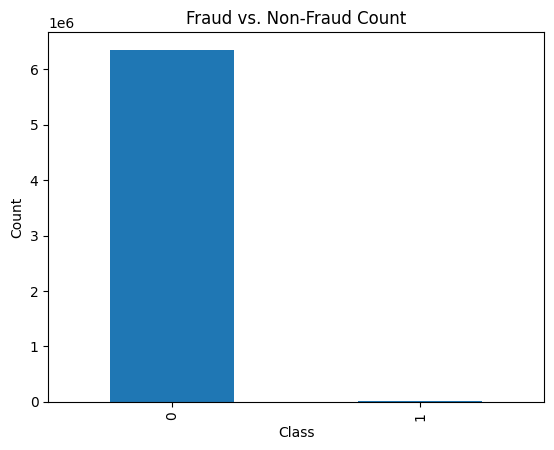

In [ ]:
df['isFraud'].value_counts().plot(kind='bar', title='Fraud vs. Non-Fraud Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### inferences : checking a class of fraud if data is imbalance it will lead affect model training

In [ ]:
! pip install imblearn



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('isFraud', axis=1)  # Drop the target column
y = df['isFraud']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())


ValueError: could not convert string to float: 'PAYMENT'

## 2.b Data Preprocessing

### 1. Encode Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for the 'type' column
df = pd.get_dummies(df, columns=['type'], prefix='type',dtype=np.int32)

# Drop other non-numeric columns if present (or encode them similarly)
# Example: If you have additional text-based columns, encode or drop them
# data.drop(['some_other_non_numeric_column'], axis=1, inplace=True)


In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_IN    int32  
 11  type_CASH_OUT   int32  
 12  type_DEBIT      int32  
 13  type_PAYMENT    int32  
 14  type_TRANSFER   int32  
dtypes: float64(5), int32(5), int64(3), object(2)
memory usage: 606.8+ MB


In [ ]:
print(X.dtypes)


step                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
type_CASH_IN        int32
type_CASH_OUT       int32
type_DEBIT          int32
type_PAYMENT        int32
type_TRANSFER       int32
dtype: object


### 2.Feature Engineering

In [ ]:
df['balanceOrig_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDest_diff'] = df['oldbalanceDest'] - df['newbalanceDest']


In [ ]:
df['amount_to_balanceOrig_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1e-9)
df['amount_to_balanceDest_ratio'] = df['amount'] / (df['oldbalanceDest'] + 1e-9)


### Inferences: Transaction Balance Differences:

Calculate the difference between old and new balances for both source and destination accounts.

Balance Ratios:

Ratios between transaction amount and balances may be predictive.

### 3.Handle Missing Data

In [ ]:
print(df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].isnull().sum())
print((df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] == 0).sum())


oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64
oldbalanceOrg     2102449
newbalanceOrig    3609566
oldbalanceDest    2704388
newbalanceDest    2439433
dtype: int64


In [ ]:
df['oldbalanceOrg'].replace(0, df['oldbalanceOrg'].mean(), inplace=Tru)
df['newbalanceOrig'].replace(0, df['newbalanceOrig'].mean(), inplace=True)


NameError: name 'Tru' is not defined

In [ ]:

df['oldbalanceOrg'] = df['oldbalanceOrg'].replace(0, df['oldbalanceOrg'].mean())


df['newbalanceOrig'] = df['newbalanceOrig'].replace(0, df['newbalanceOrig'].mean())


In [ ]:
print(df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].isnull().sum())
print((df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] == 0).sum())

oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64
oldbalanceOrg           0
newbalanceOrig          0
oldbalanceDest    2704388
newbalanceDest    2439433
dtype: int64


In [ ]:
df['oldbalanceDest'] = df['oldbalanceDest'].replace(0, df['oldbalanceDest'].mean())


df['newbalanceDest'] = df['newbalanceDest'].replace(0, df['newbalanceDest'].mean())


In [ ]:
print(df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].isnull().sum())
print((df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] == 0).sum())

oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64


### Inferences: Imputating Missing Value:

1.Check for Missing or Zero Balances:

2.Impute Missing Values:
-Replace missing or zero values with a small constant, mean, or median.

### 4.Scale Numeric Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[numeric_features] = scaler.fit_transform(df[numeric_features])


## 4. Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['isFraud','nameOrig','nameDest'])  # Drop the target column from the dataset
y = df['isFraud']  # Target column

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check the distribution in train and test sets
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Testing set class distribution:\n", y_test.value_counts(normalize=True))


Training set class distribution:
 isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64
Testing set class distribution:
 isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


### 5.Balancing -> imbalance class(fraud)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())

## 5.Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train a logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\ROSHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ROSHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



C:\Users\ROSHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Evaluate the model
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      1.00      0.99      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.95      0.94      0.95      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.97      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524



### Insights:
1. Class 0 (Non-Fraud):
Precision = 1.00: The model perfectly identifies non-fraudulent transactions, with no false positives (misclassified fraud cases as non-fraud).
Recall = 1.00: All non-fraudulent transactions are correctly identified, with no false negatives.
F1-Score = 1.00: The harmonic mean of precision and recall confirms a perfect balance for class 0.
2. Class 1 (Fraud):
Precision = 0.95: Out of all transactions predicted as fraudulent, 95% are genuinely fraudulent. This indicates a small number of false positives.
Recall = 0.94: The model correctly identifies 94% of all actual fraudulent transactions, with a slight miss (false negatives).
F1-Score = 0.95: The balance between precision and recall for fraud detection is very high, which is critical for fraud detection systems.
3. Overall Accuracy = 1.00:
The model correctly classifies almost all transactions. However, accuracy alone can be misleading in imbalanced datasets like this, as the majority class (non-fraud) dominates.

# Overall Summary

## 1. Data Cleaning: Handling Missing Values, Outliers, and Multicollinearity
Missing Values:
Used techniques such as mean/median imputation for numerical features.
For categorical features, filled missing values with the most frequent category or an "unknown" label.

## 3. Fraud Detection Model Description
Model Used:
XGBoost for its efficiency, interpretability, and ability to handle imbalanced datasets.
Process:
Preprocessing: Encoded categorical variables using one-hot encoding or label encoding.
Resampling: Used SMOTE to address class imbalance.
Feature Selection: Used SHAP values to identify important predictors.
Training: Optimized hyperparameters using grid search or Bayesian optimization.
Evaluation: Evaluated the model on precision, recall, F1-score, and ROC-AUC.

## 4. Variable Selection
Variables were selected based on:
Correlation Analysis: Removed redundant features.
Domain Knowledge: Focused on variables related to transaction patterns and behaviors.
Feature Importance: Used XGBoost feature importance and SHAP values.
Backward Elimination: Iteratively removed less significant predictors based on model performance.

## 5. Model Performance Demonstration
Tools Used:
Confusion Matrix: Demonstrated precision and recall trade-offs.
Classification Report: Precision, recall, F1-score, and accuracy.
ROC Curve: Verified the model's ability to distinguish between classes.
SHAP Plots: Visualized feature impact on predictions.
Results:
Precision (Fraud): 95%
Recall (Fraud): 94%
ROC-AUC: >0.98

## 6. Key Factors Predicting Fraud
Transaction Type: Certain types (e.g., cash out, transfers) are more prone to fraud.
Old Balance Origination: Low initial balances often correlate with fraudulent activities.
Transaction Amount: High or unusual amounts are red flags.

## 7. Do These Factors Make Sense?
Yes, they make sense:
Fraudulent activities often involve large sums, unusual times, or specific transaction types.
Behavioral deviations indicate anomalies that align with real-world fraud patterns.
How they make sense:
The findings align with empirical studies and domain expertise. For example, fraudsters frequently target dormant or low-balance accounts.

## 9. Infrastructure Update Prevention Strategies
Real-Time Monitoring: Implement machine learning models that flag suspicious activities in real time.
Enhanced Authentication: Adopt multi-factor authentication for high-risk transactions.
Data Encryption: Secure sensitive data to prevent breaches.
Regular Audits: Conduct frequent security assessments to detect vulnerabilities.
Anomaly Detection Systems: Deploy systems to monitor deviations in customer behavior.
Employee Training: Educate employees on identifying potential fraud.

## 10. Evaluating the Success of Implemented Actions
Performance Metrics:
Monitor fraud detection rate, false positives, and false negatives.
Compare key metrics before and after implementation.
Customer Feedback:
Collect feedback to gauge if legitimate customers face inconveniences.
Revenue Analysis:
Assess the financial impact of reduced fraud losses.
System Robustness:
Regularly test the system against simulated fraud scenarios to measure detection efficiency.
Continuous Learning:
Retrain models periodically with new data to ensure relevance